In [1]:
import math
import os
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from random import sample
from PIL import Image

In [51]:
IMG_DIR = '/Users/sebastian/University/Master/second_term/cil/road-segmentation/data/training/images/'
GT_DIR = '/Users/sebastian/University/Master/second_term/cil/road-segmentation/data/training/groundtruth/'

In [95]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def calculate_mean_rgb(image):
    """Calculate mean RGB values for a given image."""
    return np.mean(image, axis=(0, 1))

def plot_rgb_distribution(image_dir, gt_dir, num_bins=30):
    # Lists to store mean RGB values
    mean_r_values = []
    mean_g_values = []
    mean_b_values = []

    mean_r_values_s = []
    mean_g_values_s = []
    mean_b_values_s = []

    image_files = [f for f in os.listdir(image_dir) if f.endswith('.png') or f.endswith('.jpg')]
    
    for img_file in tqdm(image_files, desc="Processing images"):
        img_path = os.path.join(image_dir, img_file)
        mask_path = img_path.replace('images', 'groundtruth')
        if 'dg' in img_path:
            mask_path = mask_path.replace('sat', 'mask')
        img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        
        # Calculate mean RGB values
        mean_r, mean_g, mean_b = calculate_mean_rgb(img)
        mean_r_values.append(mean_r)
        mean_g_values.append(mean_g)
        mean_b_values.append(mean_b)

        mask[mask!= 0] = 255
        r_channel = img[:, :, 2][mask == 255]  # Red channel
        g_channel = img[:, :, 1][mask == 255]  # Green channel
        b_channel = img[:, :, 0][mask == 255]  # Blue channel
        mean_r_values_s.append(np.mean(r_channel))
        mean_g_values_s.append(np.mean(g_channel))
        mean_b_values_s.append(np.mean(b_channel))

    print(f"Channel Mean Red {np.mean(mean_r_values_s)} std: {np.std(mean_r_values_s)}")
    print(f"Channel Mean Green {np.mean(mean_g_values_s)} std: {np.std(mean_g_values_s)}")
    print(f"Channel Mean Blue {np.mean(mean_b_values_s)} std: {np.std(mean_b_values_s)}")

    # Create histograms
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.hist(mean_r_values, bins=num_bins, color='red', edgecolor='black', alpha=0.7)
    plt.title('Mean Red Value Distribution')
    plt.xlabel('Mean Red Intensity')
    plt.ylabel('Frequency')

    plt.subplot(2, 3, 2)
    plt.hist(mean_g_values, bins=num_bins, color='green', edgecolor='black', alpha=0.7)
    plt.title('Mean Green Value Distribution')
    plt.xlabel('Mean Green Intensity')
    plt.ylabel('Frequency')

    plt.subplot(2, 3, 3)
    plt.hist(mean_b_values, bins=num_bins, color='blue', edgecolor='black', alpha=0.7)
    plt.title('Mean Blue Value Distribution')
    plt.xlabel('Mean Blue Intensity')
    plt.ylabel('Frequency')

    plt.subplot(2, 3, 4)
    plt.hist(mean_r_values_s, bins=num_bins, color='red', edgecolor='black', alpha=0.7)
    plt.title('Mean Red Value Distribution')
    plt.xlabel('Mean Red Intensity')
    plt.ylabel('Frequency')

    plt.subplot(2, 3, 5)
    plt.hist(mean_g_values_s, bins=num_bins, color='green', edgecolor='black', alpha=0.7)
    plt.title('Mean Green Value Distribution')
    plt.xlabel('Mean Green Intensity')
    plt.ylabel('Frequency')

    plt.subplot(2, 3, 6)
    plt.hist(mean_b_values_s, bins=num_bins, color='blue', edgecolor='black', alpha=0.7)
    plt.title('Mean Blue Value Distribution')
    plt.xlabel('Mean Blue Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

Processing images: 100%|█████████████████████| 144/144 [00:01<00:00, 142.53it/s]


Channel Mean Red 127.53376879537902 std: 22.159251754728558
Channel Mean Green 129.9037049739306 std: 16.83839557769458
Channel Mean Blue 132.99672323250232 std: 14.123010515491698


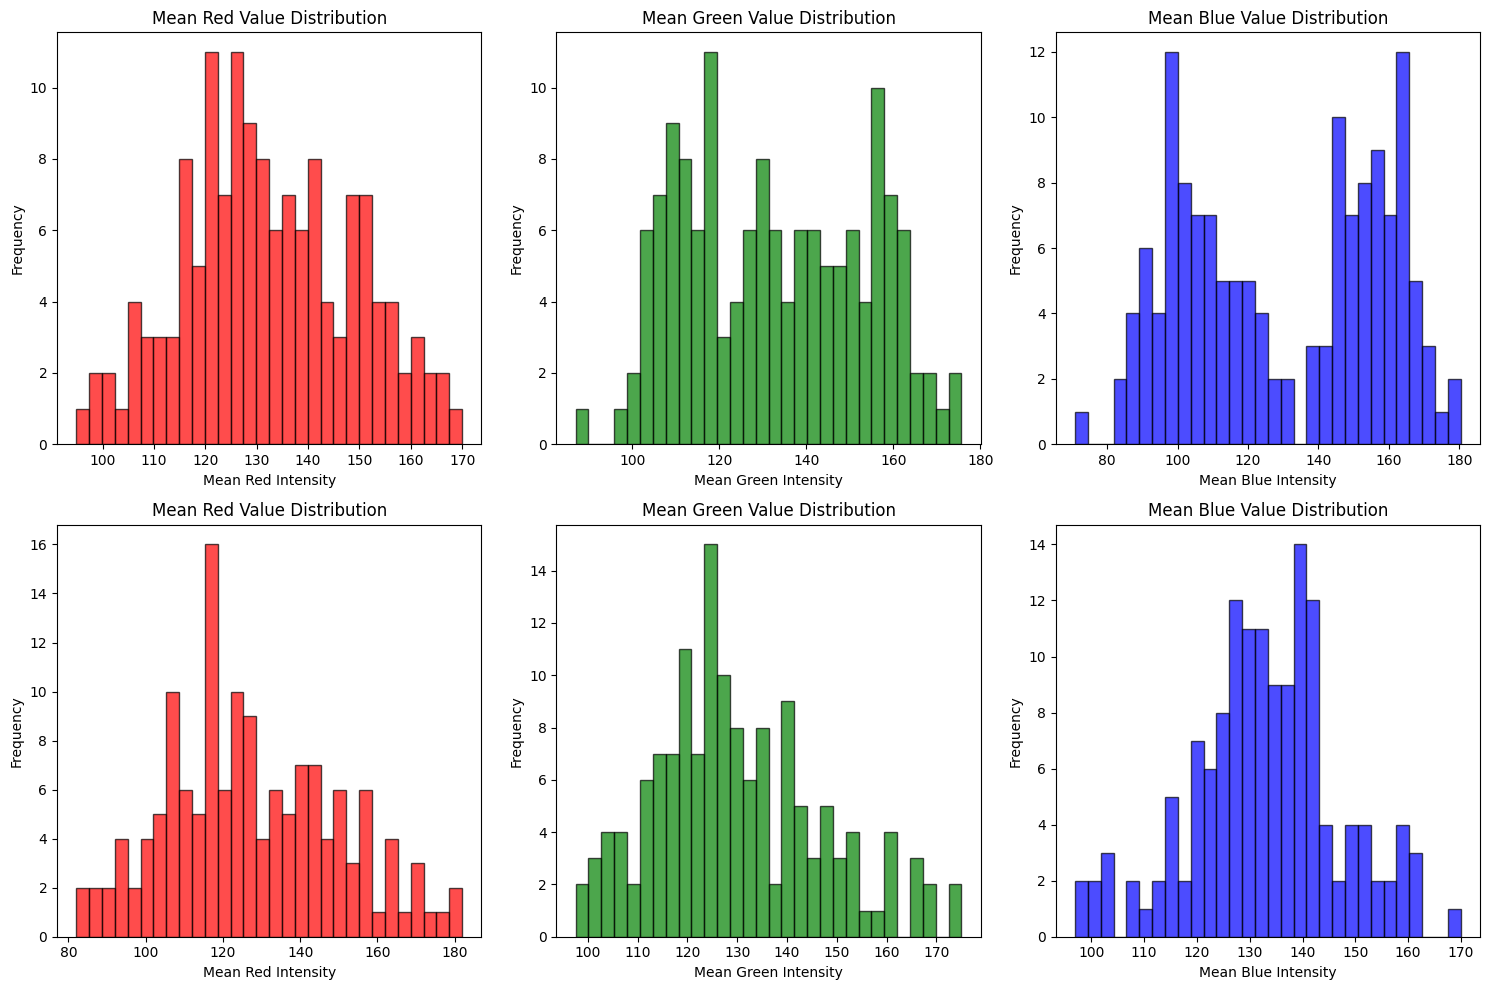

In [96]:
image_directory = IMG_DIR + "eth"
gt_dir = GT_DIR + "eth"
plot_rgb_distribution(image_directory, gt_dir)

Processing images: 100%|█████████████████████| 100/100 [00:00<00:00, 151.15it/s]


Channel Mean Red 86.4436070260915 std: 11.374039284021041
Channel Mean Green 84.39788072036121 std: 10.44946708864102
Channel Mean Blue 75.52603833056129 std: 11.041141508183328


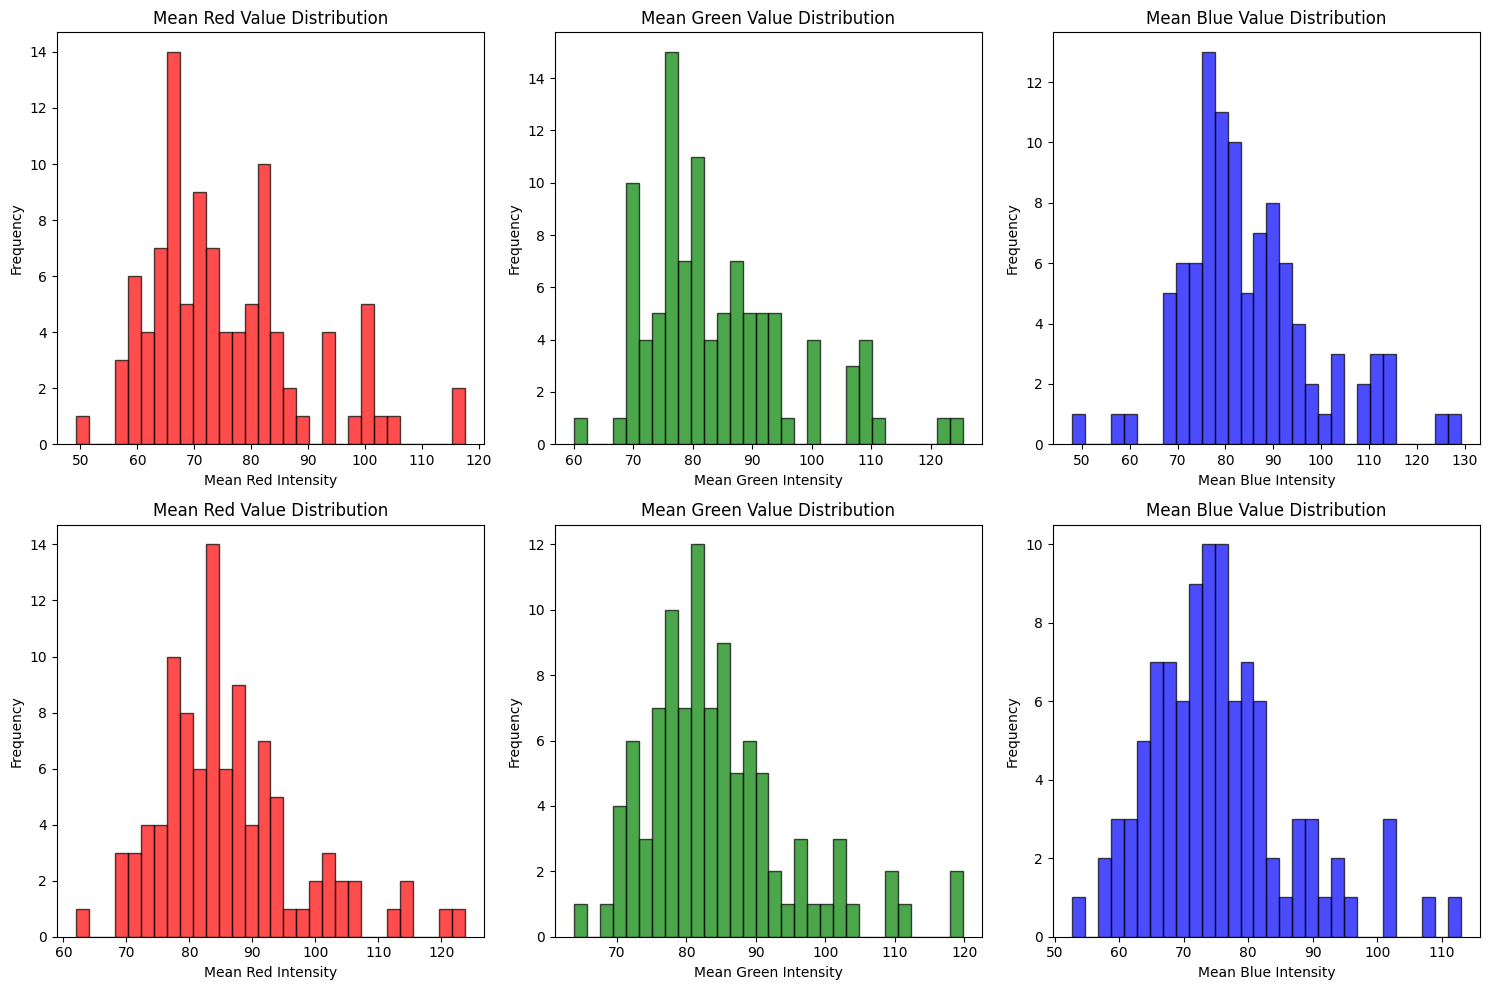

In [91]:
image_directory = IMG_DIR + "epfl"
gt_dir = GT_DIR + "epfl"
plot_rgb_distribution(image_directory, gt_dir)

Processing images: 100%|█████████████████████| 250/250 [00:01<00:00, 156.00it/s]


Channel Mean Red 117.28914151283293 std: 18.4807186114121
Channel Mean Green 111.78601766539572 std: 16.26962787898152
Channel Mean Blue 95.32593533837932 std: 17.49118311508385


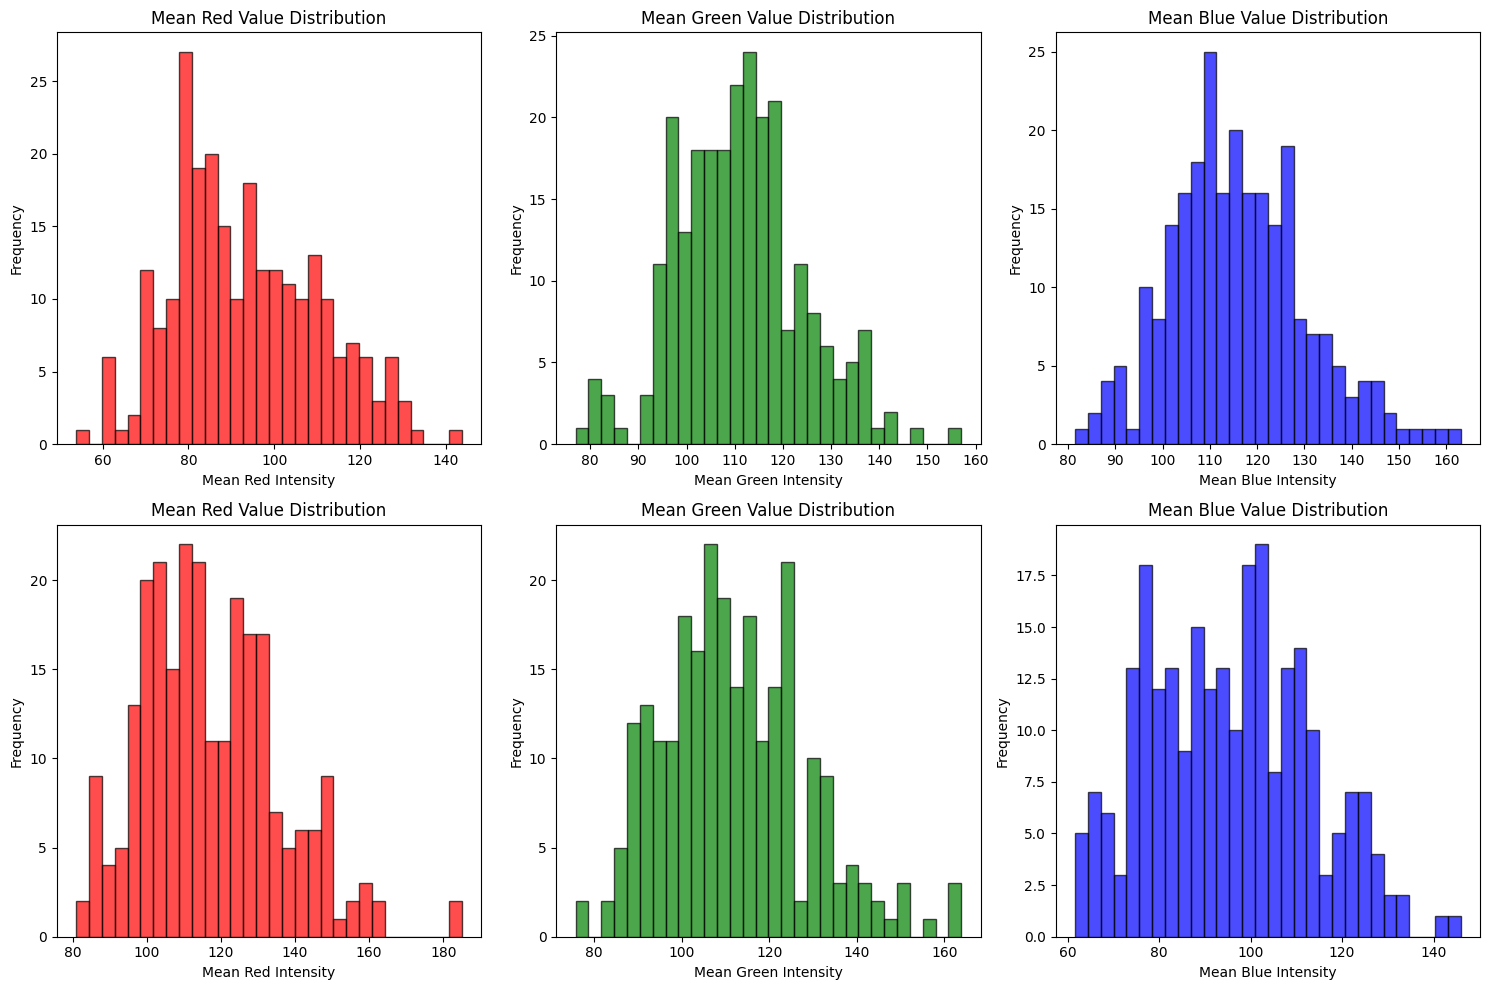

In [92]:
image_directory = IMG_DIR + "deepglobe_small"
gt_dir = GT_DIR + "deepglobe_small"
plot_rgb_distribution(image_directory, gt_dir)

Processing images: 100%|█████████████████████| 261/261 [00:01<00:00, 151.50it/s]


Channel Mean Red 130.82153585766625 std: 17.056575274143956
Channel Mean Green 127.29455356078738 std: 14.779921625204398
Channel Mean Blue 116.04071009795624 std: 13.09080429407446


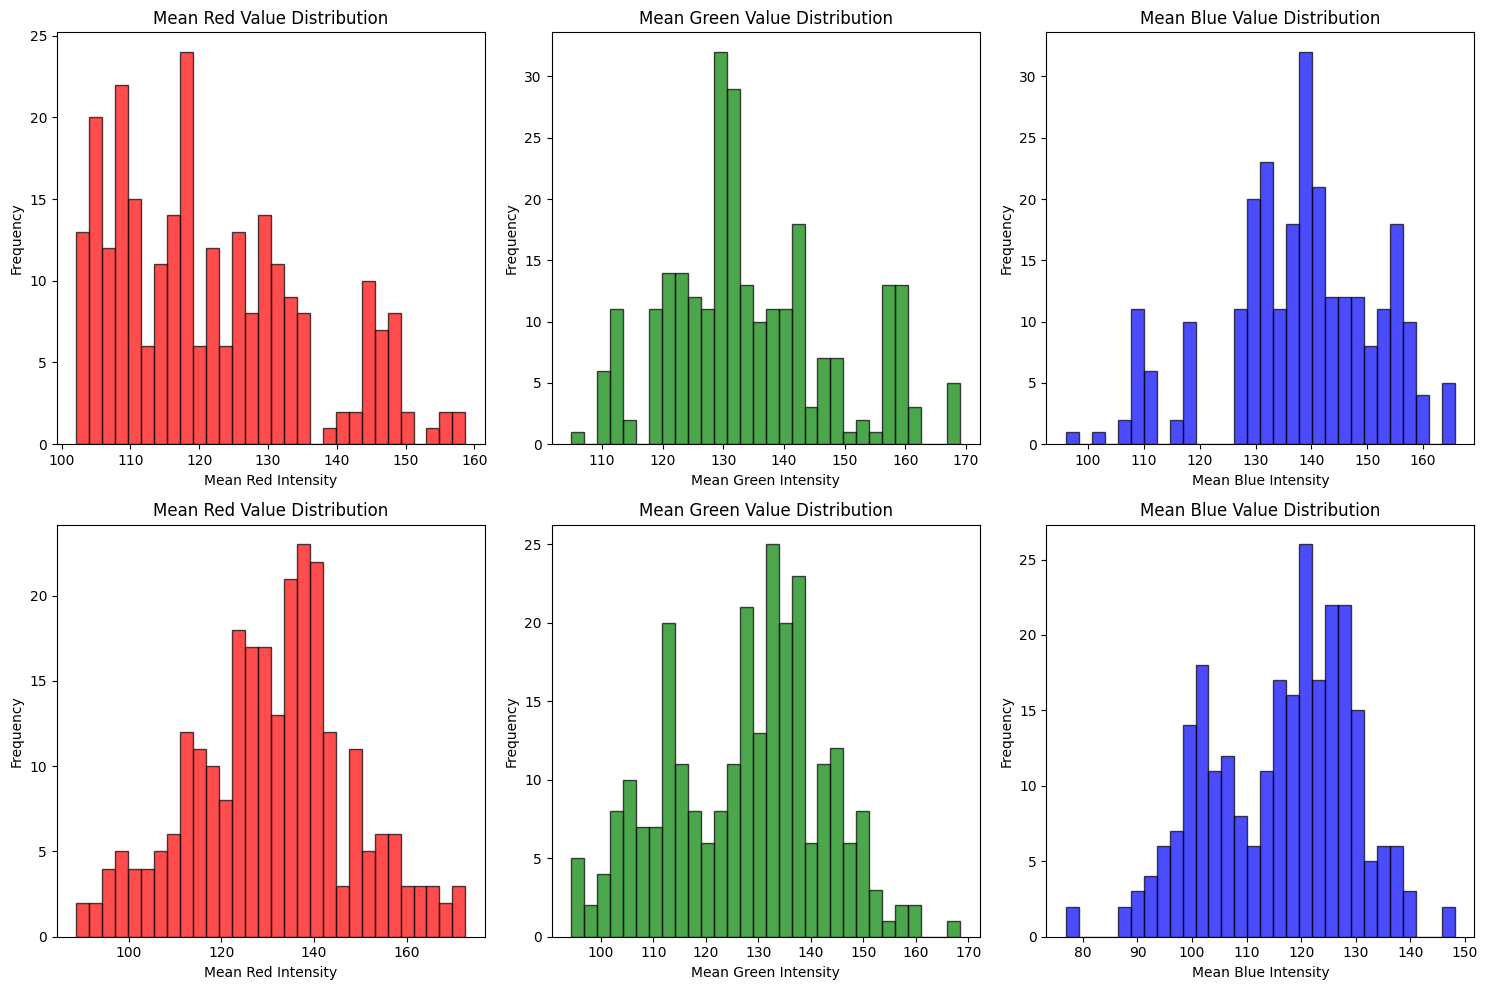

In [93]:
image_directory = IMG_DIR + "deepglobe_small2"
gt_dir = GT_DIR + "deepglobe_small2"
plot_rgb_distribution(image_directory, gt_dir)

Processing images: 100%|███████████████████| 3750/3750 [00:23<00:00, 161.83it/s]


Channel Mean Red 115.5066233511066 std: 20.95857922244791
Channel Mean Green 109.41194890296185 std: 17.658190988484566
Channel Mean Blue 91.21366981331317 std: 17.845295254041748


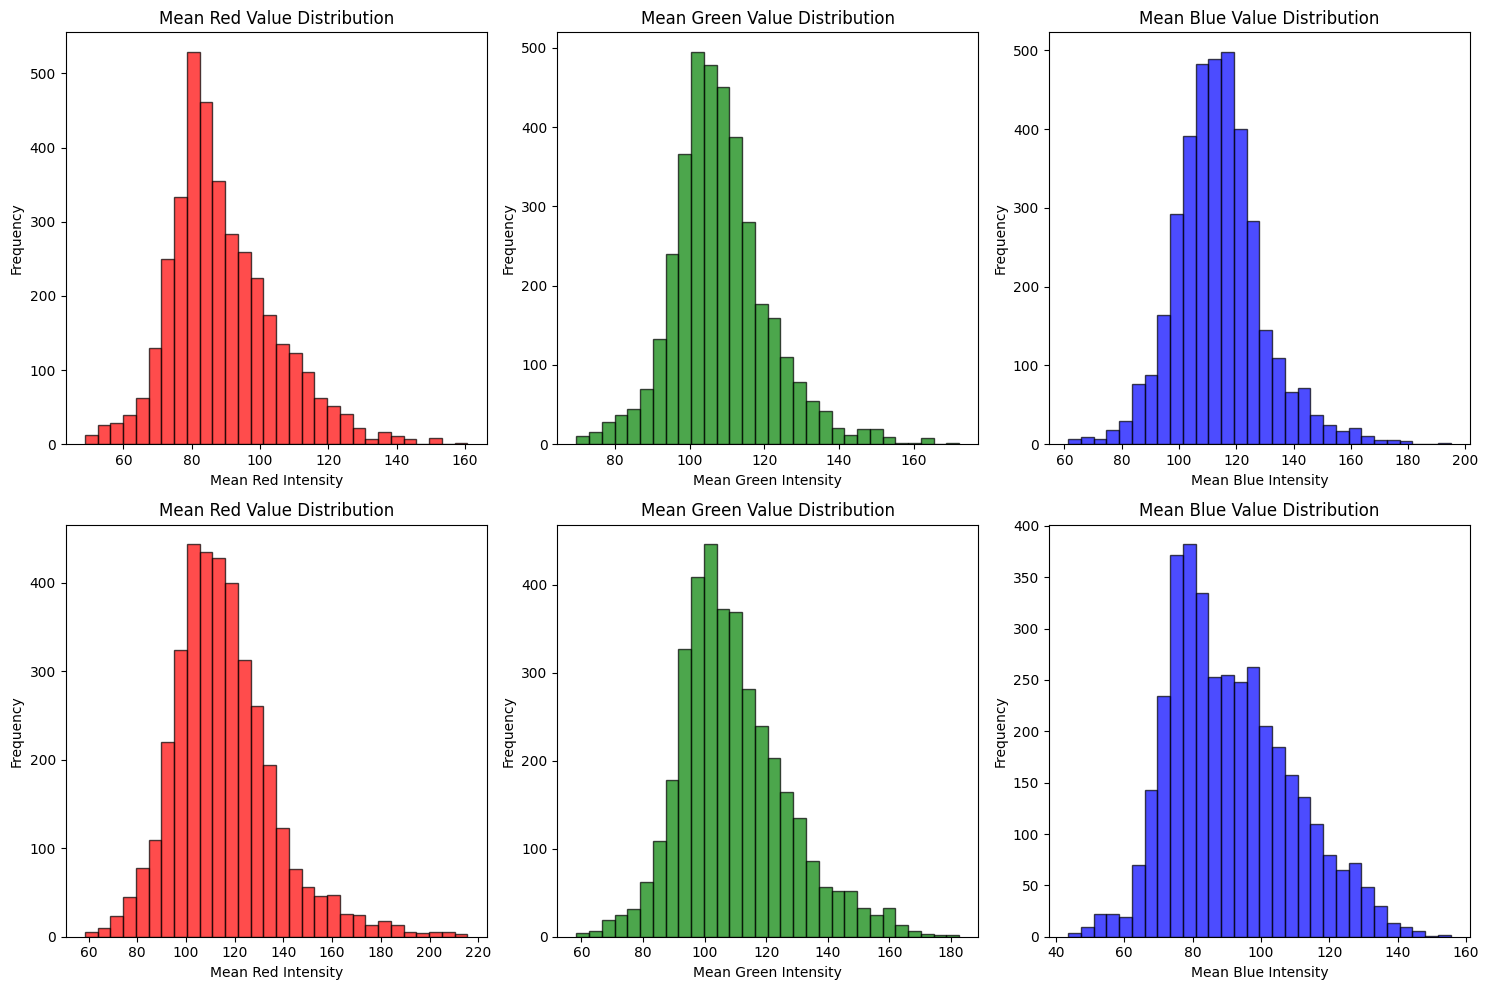

In [94]:
image_directory = IMG_DIR + "deepglobe_filtered"
gt_dir = GT_DIR + "deepglobe_filtered"
plot_rgb_distribution(image_directory, gt_dir)